In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sn

In [2]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [3]:
Data = pd.read_excel('Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx')
Data["SESSO"].replace({'M': 0.,'F': 1.}, inplace=True)

In [4]:
def Suprimun_Tnorm(Relation, data):
    ror = np.vstack((Relation, data))
    sup_norm = np.max(np.min(ror, axis=0))
    return sup_norm


def composition(relation , data):
    composed = np.array(list(map(lambda x: list(map(lambda y: Suprimun_Tnorm(relation[x], data[y]),range(data.shape[0]))),range(relation.shape[0]))))
    return composed


def split_by_class(TrainData):
    Data0 = TrainData[TrainData['TARGET']==0]
    target0 = Data0['TARGET']
    Data0 = Data0.drop('TARGET',axis=1)
    # Data0=(Data0-Data0.min())/(Data0.max()-Data0.min())
    Data1 = TrainData[TrainData['TARGET']==1]
    target1 = Data1['TARGET']
    Data1 = Data1.drop('TARGET',axis=1)
    # Data1=(Data1-Data1.min())/(Data1.max()-Data1.min())
    Data2 = TrainData[TrainData['TARGET']==2]
    target2 = Data2['TARGET']
    Data2 = Data2.drop('TARGET',axis=1)
    # Data2=(Data2-Data2.min())/(Data2.max()-Data2.min())
    return Data0 , Data1, Data2 , target0, target1, target2 



In [5]:
#fill misiing values 
imputer= KNNImputer(n_neighbors=4)
Data = imputer.fit_transform(Data[['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET']])
Data = pd.DataFrame(Data, columns = ['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET'])
# Data = pd.concat([Data1, Data2,Data0])


#remove targets:
trgt = Data['TARGET']
Data = Data.drop('TARGET',axis=1)

In [6]:
pca=PCA(n_components=12)
pca.fit(Data)
NewData=pca.transform(Data)


In [7]:
NewData = pd.DataFrame(NewData, columns = ['F1','F1','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12'])

# NewData = pd.DataFrame(NewData, columns = ['F1','F1','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15',])

In [8]:
NewData = pd.concat([NewData, trgt.rename('TARGET')], axis=1)

In [9]:
NewData

,F1,F1,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,TARGET
0,-155.412443,-51.662029,65.723160,-23.947640,1.473836,-6.471144,-16.250793,6.158272,-3.286475,0.019904,-0.548254,0.265722,2.0
1,-202.771952,-27.602415,43.273070,-18.688068,-1.318485,-1.812994,-14.683243,4.721535,-2.853208,0.161300,-0.549958,0.308170,2.0
2,-1.006311,-74.266199,-13.067914,93.121023,-14.308586,-0.758448,1.719532,-7.509019,-4.060883,-2.091702,-0.072961,0.210053,2.0
3,323.441337,-115.863595,-102.782209,108.087356,-6.821593,26.802078,-7.316195,-7.102443,3.417422,-0.860901,0.435064,0.164372,2.0
4,-29.930090,135.587109,77.972655,60.823853,-54.905935,-4.009484,-4.122472,-12.786532,-2.330022,-1.494357,0.293937,0.376393,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,-185.641784,35.716807,-58.786146,-18.575868,4.986806,17.252551,-0.188935,16.558904,-0.909464,-2.212381,1.198841,-0.301156,0.0
275,-206.842013,19.099677,174.045734,38.513421,-12.664641,-4.431166,11.073486,39.721665,3.935710,-0.993287,-0.440660,0.251907,0.0
276,-107.515411,84.297249,-121.610928,-51.247106,-22.169879,43.640562,-4.491802,11.414128,4.839348,2.317871,-0.456503,-0.482630,0.0
277,-107.551793,77.938699,-91.637155,-7.579478,-69.524569,100.619236,32.873288,20.859789,1.133153,0.506983,0.577297,-0.127171,0.0


In [10]:
#split to teset and train 
# Dataset1 = PreprocessData.NomalizeData(Data)
Dataset = PreprocessData.TestAndTrain(NewData , 80)

TrainData = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)
# TestData=(TestData-TestData.min())/(TestData.max()-TestData.min())

In [11]:
Data0 , Data1, Data2 , target0, target1, target2  = split_by_class(NewData)
    

In [13]:


#method 2 , create similarity matrix based on mean of the class 
avg0 = Data0.mean()
# avg0['SESSO']=0
avg1 = Data1.mean()
# avg1['SESSO']=0
avg2 = Data2.mean()
# avg1['SESSO']=0
avg0 = np.array(avg0)
avg1 = np.array(avg1)
avg2 = np.array(avg2)


In [14]:
avg0.shape

(12,)

In [15]:
avg1.shape

(12,)

In [16]:
avg2.shape

(12,)

In [17]:
RelationMatrix =[ avg0,avg1,avg2]
# RelationMatrix =[ var0,var1,var2]

In [18]:
RelationMatrix = np.array(RelationMatrix)

In [19]:
RelationMatrix.shape

(3, 12)

In [20]:
RelationMatrix

array([[-8.04174073e+01,  1.62934420e+01, -1.18479275e+01,
        -1.37880291e+00, -5.54985050e+00,  4.79651570e+00,
        -2.37481592e+00,  7.68129208e-01,  1.84358053e+00,
         2.60944661e-01,  6.99930192e-02, -9.48913810e-02],
       [ 1.74897634e-01,  3.57263820e+00,  2.19342015e+01,
        -1.05773920e+00,  4.68319910e-01, -6.63027934e+00,
        -1.08869739e+00,  1.49885690e-01, -1.77278699e+00,
        -1.82270872e-01,  1.86517713e-02,  1.84781098e-02],
       [ 1.13669601e+02, -2.82924736e+01, -1.52028132e+01,
         3.49584046e+00,  7.17932167e+00,  2.87409346e+00,
         4.95200625e+00, -1.30676634e+00, -2.64247268e-02,
        -1.03859916e-01, -1.26357277e-01,  1.07482213e-01]])

In [37]:
TestData = np.array(TestData)
SimilarityMatrix = composition(RelationMatrix , TestData)


In [22]:

predict = []
for i in range(SimilarityMatrix.shape[1]):
    a = np.argmax(SimilarityMatrix[:,i])
    predict.append(a)

In [23]:
atcutal= np.array(targetTest)
predict = np.array(predict)

In [29]:
conf3 = confusion_matrix(atcutal, predict )

In [30]:
accuracy_score(atcutal, predict)

0.5357142857142857

In [31]:
#change 3 class to two class , class 0 and class 1
actual1 =np.zeros(len(predict))
pred1 =np.zeros(len(predict))
for i in range(len(predict)):
    if(predict[i] == 2 ):
        pred1[i]=1
    else:
        pred1[i]=predict[i]
    if(atcutal[i]==2):
        actual1[i]=1
    else:
        actual1[i] = atcutal[i]

In [32]:
accuracy_score(actual1, pred1)

0.7321428571428571

In [33]:
conf2= confusion_matrix(actual1, pred1 )

<AxesSubplot:>

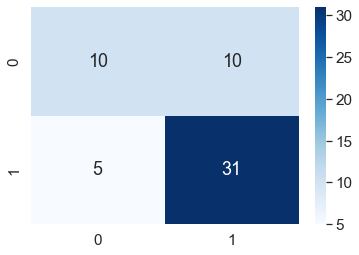

In [34]:

df_cm = pd.DataFrame(conf2, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18} , cmap='Blues')

<AxesSubplot:>

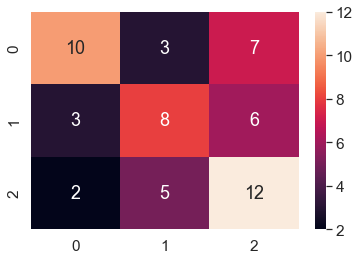

In [35]:
df_cm = pd.DataFrame(conf3, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18}) # font size